<a id="0"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  17: Web API - Utkarsh Gaikwad</p>

[Assignment pdf link](18%20Feb_AssQ.pdf)

<a id="1"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 1</p>

## Question 1: What is an API? Give an example, where an API is used in real life.
---

## Answer:

### API stands for Application Programming Interface. It is a set of protocols, routines, and tools for building software applications. APIs allow different software systems to communicate with each other and exchange information, even if they are built using different programming languages, operating systems, or platforms.

### Real Life Example of one stock market API is the Alpha Vantage API. This API provides real-time and historical stock market data, as well as technical indicators and other financial data, for stocks, ETFs, mutual funds, and cryptocurrencies.

### Developers can use the Alpha Vantage API to build financial applications that require stock market data, such as stock trading platforms, portfolio trackers, and investment research tools. The API provides various endpoints to retrieve different types of data, including real-time stock quotes, intraday stock prices, daily stock prices, and stock performance metrics like moving averages, relative strength index (RSI), and Bollinger Bands.

### Other examples of stock market APIs include the Yahoo Finance API, IEX Cloud API, and the Google Finance API (although this one is no longer actively maintained). These APIs provide similar functionality, allowing developers to access financial data for use in their applications.

### Link for Alpha Vantage Documentation Link: [https://www.alphavantage.co/documentation/](https://www.alphavantage.co/documentation/)

### Generating API Key for Alpha Vantege: [https://www.alphavantage.co/support/#api-key](https://www.alphavantage.co/support/#api-key)

In [13]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


### I have used Alpha Vantage REST API to fetch SBI Banks (BSE) stock share prices in below code

In [14]:
import requests

ticker = 'SBIN.BSE'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol='+ ticker +'&apikey=HZ8QGOLXW2U01N2E'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'SBIN.BSE', '3. Last Refreshed': '2023-02-17', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-02-17': {'1. open': '539.15', '2. high': '539.5', '3. low': '527.8', '4. close': '530.9', '5. adjusted close': '530.9', '6. volume': '771672', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-16': {'1. open': '546.05', '2. high': '546.75', '3. low': '539.0', '4. close': '540.1', '5. adjusted close': '540.1', '6. volume': '263883', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-15': {'1. open': '541.45', '2. high': '544.65', '3. low': '537.0', '4. close': '542.2', '5. adjusted close': '542.2', '6. volume': '294189', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-14': {'1. open': '539.7', '2. high': '544.6', '3. low': '530.8', '4. close': '540.65', '5. adjusted close': '540.65', '6

In [15]:
# Getting dates from Time Series Daily
dates = list(data['Time Series (Daily)'].keys())
dates[0:5]

['2023-02-17', '2023-02-16', '2023-02-15', '2023-02-14', '2023-02-13']

In [16]:
prices = list(data['Time Series (Daily)'].values())
prices[0:2]

[{'1. open': '539.15',
  '2. high': '539.5',
  '3. low': '527.8',
  '4. close': '530.9',
  '5. adjusted close': '530.9',
  '6. volume': '771672',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 {'1. open': '546.05',
  '2. high': '546.75',
  '3. low': '539.0',
  '4. close': '540.1',
  '5. adjusted close': '540.1',
  '6. volume': '263883',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'}]

In [17]:
open = []
high = []
low = []
close = []
adj_close = []
volume = []
for i in prices:
    open.append(float(i['1. open']))
    high.append(float(i['2. high']))
    low.append(float(i['3. low']))
    close.append(float(i['4. close']))
    adj_close.append(float(i['5. adjusted close']))
    volume.append(float(i['6. volume']))

In [18]:
# Saving into Dataframe
import pandas as pd
df_sbin = pd.DataFrame({'open':open,'high':high, 'low':low, 'close':close,'adj_close':adj_close, 'volume':volume})
df_sbin.index = dates
df_sbin = df_sbin.iloc[::-1]

In [19]:
df_sbin.head()

,open,high,low,close,adj_close,volume
2022-09-27,544.0,550.75,533.20,536.25,536.25,675627.0
2022-09-28,533.0,539.75,520.70,525.30,525.30,1189112.0
2022-09-29,528.0,535.55,519.65,521.95,521.95,1020982.0
2022-09-30,524.0,536.95,516.30,531.05,531.05,906209.0
2022-10-03,528.7,531.40,518.30,519.65,519.65,444614.0


In [20]:
df_sbin.tail()

,open,high,low,close,adj_close,volume
2023-02-13,554.70,556.80,533.4,537.30,537.30,577180.0
2023-02-14,539.70,544.60,530.8,540.65,540.65,330324.0
2023-02-15,541.45,544.65,537.0,542.20,542.20,294189.0
2023-02-16,546.05,546.75,539.0,540.10,540.10,263883.0
2023-02-17,539.15,539.50,527.8,530.90,530.90,771672.0


In [21]:
df_sbin.shape

(100, 6)

In [22]:
## Saving Data to csv file
df_sbin.to_csv('SBIN.csv',index=True)

[Link to SBIN.csv](SBIN.csv)

<AxesSubplot: title={'center': 'SBIN (BSE) Close price'}>

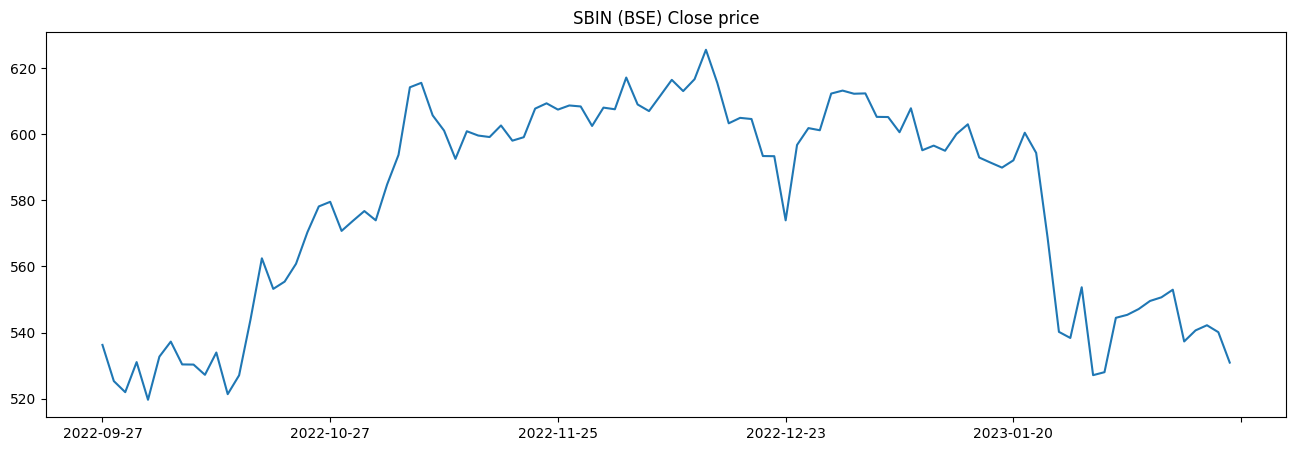

In [23]:
# Plotting close value of SBI from BSE
df_sbin['close'].plot(kind='line',figsize=(16,5),title='SBIN (BSE) Close price')

### Ticker Finder in AlphaVantage 

In [24]:
# This is used to find ticker symbol for reliance in alpha vantege
import requests

search_query = "reliance"

url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords='+search_query+'&apikey=HZ8QGOLXW2U01N2E'
r = requests.get(url)
data = r.json()

print(data)

{'bestMatches': [{'1. symbol': 'RELIANCE.BSE', '2. name': 'RELIANCE INDUSTRIES LTD.', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR', '9. matchScore': '0.8421'}, {'1. symbol': 'RELI', '2. name': 'Reliance Global Group Inc', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '0.6667'}, {'1. symbol': 'RELIW', '2. name': 'Reliance Global Group Inc - Warrants - Series A (01/02/2026)', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '0.6154'}, {'1. symbol': 'RELCAPITAL.BSE', '2. name': 'RELIANCE CAPITAL LTD.', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR'

<a id="2"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 2</p>

## Question 2: Give advantages and disadvantages of using API.
---

## Answer :

### Advantages of using API:

1. Interoperability: APIs enable different software systems to interact with each other seamlessly, regardless of their underlying technologies or programming languages. This allows for greater interoperability between systems and can lead to more efficient and effective software development.

2. Flexibility: APIs allow developers to create applications that are flexible and customizable. Developers can choose the specific functionality they need from an API and incorporate it into their applications, rather than building that functionality from scratch.

3. Time and cost savings: APIs can save time and money for developers and organizations by providing ready-made solutions that can be easily integrated into existing systems. This can reduce the amount of time and resources needed to build new software applications.

4. Innovation: APIs can spur innovation by allowing developers to create new applications that integrate with existing systems. This can lead to the development of new products and services that might not have been possible without APIs.


### Disadvantages of using API:

1. Complexity: APIs can be complex to use and require technical expertise to implement and maintain. This can make it challenging for non-technical users to integrate with them.

2. Security Risks: APIs can introduce security risks, such as data breaches or unauthorized access to sensitive data, if not implemented properly or if security protocols are not followed.

3. Dependency: When an application relies heavily on a third-party API, it can create a dependency on that API. Any changes or disruptions to the API can have a significant impact on the application, leading to downtime or other issues.

4. Limited functionality: APIs may not always provide all the functionality needed for a particular application. In such cases, developers may need to build custom solutions, which can be time-consuming and costly.

Overall, APIs offer significant advantages for software development and integration, but it's important to consider the potential drawbacks and risks associated with their use. Developers should carefully evaluate the pros and cons of using APIs and choose the best approach for their particular needs.

<a id="3"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 3</p>

## Question 3: What is a Web API? Differentiate between API and Web API.
---

## Answer :

### A Web API, also known as a web service, is a type of API that is accessed over the web using HTTP requests and responses. Web APIs allow applications to exchange data with web servers and access resources such as databases, file systems, or other services.

### The main difference between an API and a Web API is that APIs can be accessed through different channels, including desktop applications, mobile apps, and embedded systems, whereas Web APIs are specifically designed to be accessed over the web using HTTP.

### Another difference is that Web APIs often use standard web technologies such as REST (Representational State Transfer) or SOAP (Simple Object Access Protocol) to exchange data between systems, while APIs may use a variety of communication protocols and data formats depending on their design.

### Differences between API and Web API are as per below:
|Features        | API                           | Web API                      |
|:------:|:------------------------------|:----------------------------|
| Access | Can be accessed through various channels, including desktop applications, mobile apps, and embedded systems | Specifically designed to be accessed over the web using HTTP |
| Protocol | May use different communication protocols and data formats depending on their design | Typically use standard web technologies such as REST or SOAP |
| Resource | Can provide access to various types of services and resources, such as operating system functions, hardware devices, or databases | Provide access to web-based services and resources such as databases, file systems, or other web services |
| Integration | Can be integrated with a wide range of software systems and applications | Often integrated with web-based software systems and applications |
| Security | Security protocols can vary depending on the design and implementation of the API | Typically use standard web security protocols such as OAuth or SSL/TLS |
| Examples | Operating system APIs, hardware APIs, database APIs, etc. | AlphaVantage API, Google Maps API, Twitter API, Facebook API, etc. |


<a id="4"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 4</p>

## Question 4: Explain REST and SOAP Architecture. Mention shortcomings of SOAP.
---

## Answer :

### REST and SOAP are two different architectural styles for designing web services.

1. REST (Representational State Transfer) is an architectural style that emphasizes the use of HTTP methods and resource URIs (Uniform Resource Identifiers) to represent and manipulate web resources. RESTful APIs typically use standard HTTP methods such as GET, POST, PUT, and DELETE to retrieve, create, update, and delete resources. REST is lightweight and scalable, and can be easily implemented using simple HTTP protocols.

2. SOAP (Simple Object Access Protocol), on the other hand, is a protocol that defines a standard format for exchanging structured data between applications over the internet. SOAP relies on XML (Extensible Markup Language) as its messaging format, and typically uses the HTTP or SMTP (Simple Mail Transfer Protocol) protocols for communication. SOAP is highly structured and can be used for complex operations, but can also be more cumbersome to implement and use than RESTful APIs.

### Shortcomings of SOAP

1. One of the main shortcomings of SOAP is its complexity. SOAP relies on a complex XML schema that can be difficult to read and understand, and the protocol itself can be cumbersome to implement and use. SOAP also tends to be more resource-intensive than RESTful APIs, which can make it less suitable for high-volume or low-bandwidth environments.

2. Additionally, SOAP can be less flexible than REST, as it requires a strict adherence to a predefined interface and message format. This can make it difficult to customize or extend SOAP-based APIs to suit specific use cases or applications.

![REST vs SOAP Analogy](SOAP-vs-REST.jpg)

Credits for above image : [Upwork](https://www.upwork.com/resources/soap-vs-rest-a-look-at-two-different-api-styles)

<a id="5"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 5</p>

## Question 5: Differentiate between REST and SOAP.
---

## Answer :

### Difference between REST and SOAP As below:

|Feature         | REST                                         | SOAP                                         |
|:-------:|:---------------------------------------------|:---------------------------------------------|
| Protocol | Uses HTTP                                    | Can use HTTP, SMTP, and others                |
| Data format | Typically uses JSON or XML              | Always uses XML                              |
| Communication style | Stateless, each request contains all information needed | Can be stateful or stateless |
| Message structure | Doesn't define a specific message structure | Has a standardized message structure defined by XML schema |
| Performance | Generally faster and more lightweight       | Can be more resource-intensive and slower     |
| Flexibility | Generally more flexible                     | Often more rigid and requires more planning and design |

### Overall, the choice between REST and SOAP depends on the specific needs of the application or service being developed. REST is often preferred for smaller, high-performance applications with a smaller data footprint, while SOAP may be more appropriate for larger, enterprise-level applications that require more robust messaging capabilities.
